### Load Library & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sys
sys.path.insert(0, '../script/')
from data_exploratory import statistics
import math

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Statistics descriptive

In [3]:
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].astype('object')

In [4]:
statistics(df, col_per_table = 7)

,Rows,Columns
,8523,12


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier
Feature Type,object,float64,object,float64,object,float64,object
Unique Values,1559,416,5,7880,16,5938,10
Missing Values,0 (0.0%),1463 (17.17%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%)
Mean,-,12.8576,-,0.0661,-,140.993,-
Median,-,12.6,-,0.0539,-,143.013,-
Min,-,4.555,-,0,-,31.29,-
Max,-,21.35,-,0.3284,-,266.888,-
Standard Deviation,-,4.6435,-,0.0516,-,62.2751,-
Outlier Upper Limit,-,28.9644,-,0.196,-,323.37,-
Outlier Lower Limit,-,-3.3406,-,-0.0744,-,-43.8993,-


,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Feature Type,object,object,object,object,float64
Unique Values,9,4,3,4,3493
Missing Values,0 (0.0%),2410 (28.28%),0 (0.0%),0 (0.0%),0 (0.0%)
Mean,-,-,-,-,2181.29
Median,-,-,-,-,1794.33
Min,-,-,-,-,33.29
Max,-,-,-,-,13087
Standard Deviation,-,-,-,-,1706.5
Outlier Upper Limit,-,-,-,-,6501.87
Outlier Lower Limit,-,-,-,-,-2566.33


### Data visualization

In [5]:
# Function for define numerical and categorical variables
def numerical(df):
    num=list(df.columns[(df.dtypes=='float')|(df.dtypes=='int64')])
    return num

def categorical(df):
    cat=list(df.columns[df.dtypes=='object'])
    return cat

num_var = numerical(df)
print('\nNumerical features :', num_var)
cat_var = categorical(df)
print('\nCategorical features :', cat_var)
Y = 'Item_Outlet_Sales'

hist_var = [
 'Item_Fat_Content',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'
]


Numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

Categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [6]:
for i in num_var:
    df[i].fillna(0,inplace=True)

#### 1. Univariate Analysis of Numerical Variables

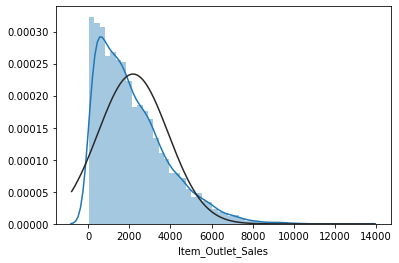

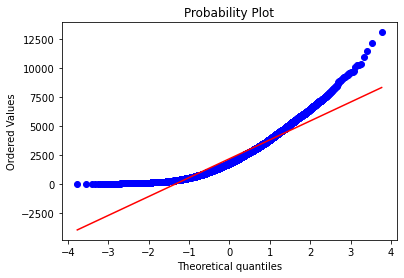

In [7]:
# Histogram and normal probability plot of Response variable
sns.distplot(df[Y], fit=norm);
fig = plt.figure()
res = stats.probplot(df[Y], plot=plt)


DISTRIBUTION PLOT OF :


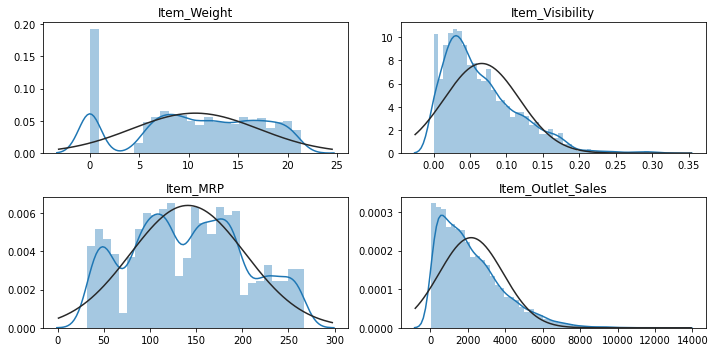

In [8]:
def multi_distplot(df,NUMERIC_FITUR,length,width):
    fig, axes = plt.subplots(math.ceil(len(NUMERIC_FITUR)/length),width,figsize=(10,5))

    ax = axes.ravel()
    print('\nDISTRIBUTION PLOT OF :')

    for i in range(len(NUMERIC_FITUR)):
        sns.distplot(df[NUMERIC_FITUR[i]],ax=ax[i], fit=norm)
        ax[i].set_title(NUMERIC_FITUR[i])
        ax[i].set_xlabel('')
        
    plt.tight_layout()
    plt.show()

multi_distplot(df,num_var,2, 2)


HISTOGRAM OF :


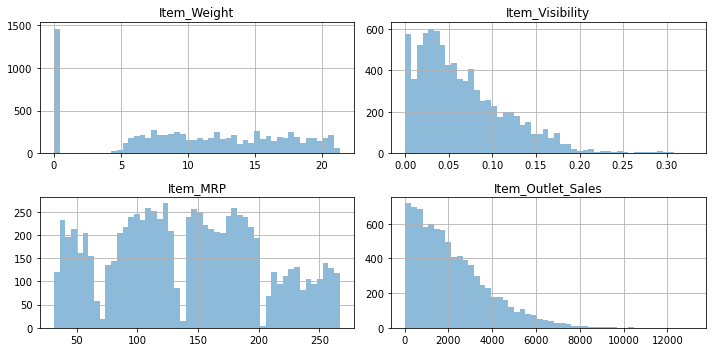

In [9]:
def multi_univariate_hist(df,NUMERIC_FITUR):
    fig, axes = plt.subplots(math.ceil(len(NUMERIC_FITUR)/2),2,figsize=(10,5))

    ax = axes.ravel()
    print('\nHISTOGRAM OF :')

    for i in range(len(NUMERIC_FITUR)):
        _,bins = np.histogram(df[NUMERIC_FITUR[i]].dropna(),bins=50)
        df[NUMERIC_FITUR[i]].hist(ax=ax[i],bins=50,alpha=0.5)
        ax[i].set_title(NUMERIC_FITUR[i])
        
    plt.tight_layout()
    plt.show()
    
multi_univariate_hist(df,num_var)

#### 2. Bi-Variate Analysis for Item_Outlet_Sales vs Categorical Features

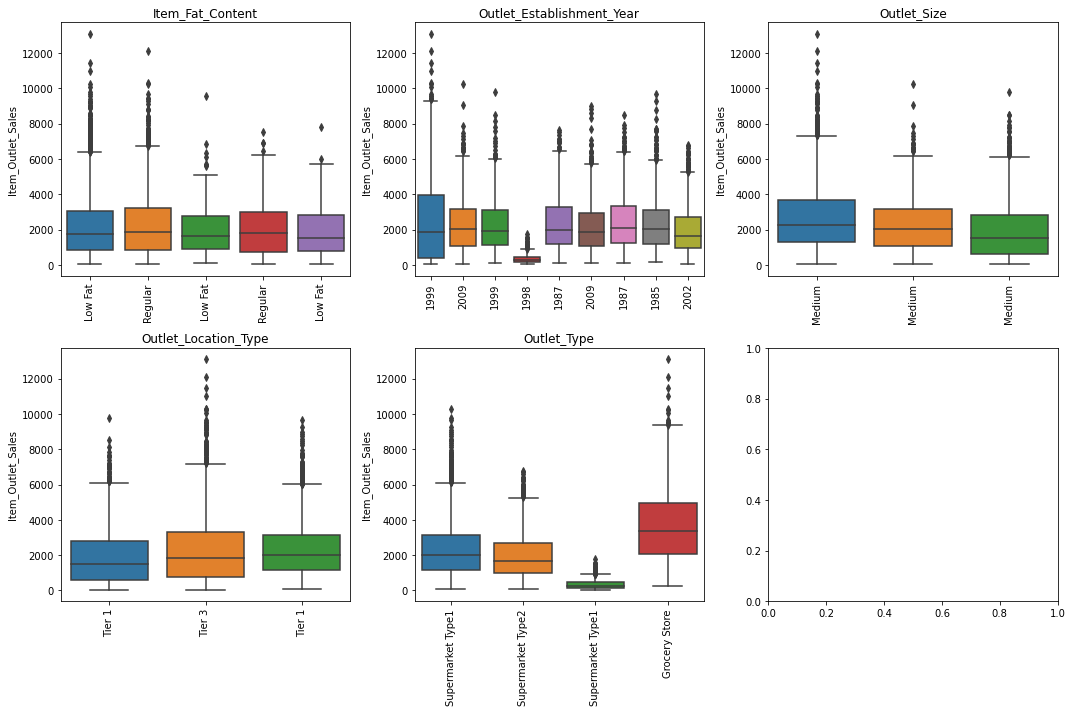

In [10]:
def multi_bivariate_hist(df,CATEGORIC_FITUR,y):
    fig, axes = plt.subplots(math.ceil(len(CATEGORIC_FITUR)/3),3,figsize=(15,10))

    ax = axes.ravel()

    for i in range(len(CATEGORIC_FITUR)):
        sns.boxplot(x=CATEGORIC_FITUR[i],y=y,data=df,ax=ax[i])
        ax[i].set_title(CATEGORIC_FITUR[i])
        ax[i].set_xlabel('')
        ax[i].set_xticklabels(df[CATEGORIC_FITUR[i]],rotation=90)

    plt.tight_layout()
    plt.show()
    
multi_bivariate_hist(df,hist_var,Y)

#### 3. Correlation Analysis

Half Triangle Correlation Heatmap

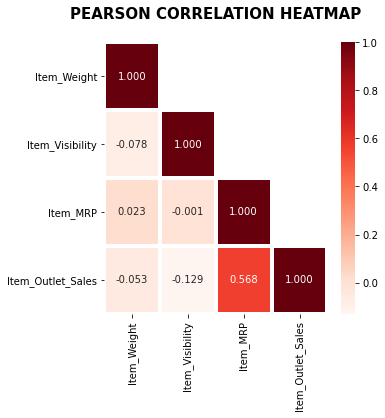

In [11]:
def plotCorrelationHeatmap(data, figsize = (10,10)):
    plt.figure(figsize=figsize)
    corr_val = data.corr(method = "pearson")
    mask = np.zeros_like(corr_val, dtype = np.bool)
    mask[np.triu_indices_from(mask, k = 1)] = True
    corr_heatmap = sns.heatmap(corr_val, mask = mask,
                               annot = True, fmt='.3f', linewidths = 3, cmap = "Reds")
    corr_heatmap.set_title("PEARSON CORRELATION HEATMAP\n", fontsize = 15, fontweight = "bold")
    corr_heatmap

plotCorrelationHeatmap(df[num_var],(5,5))

Heatmap with certain correlation value

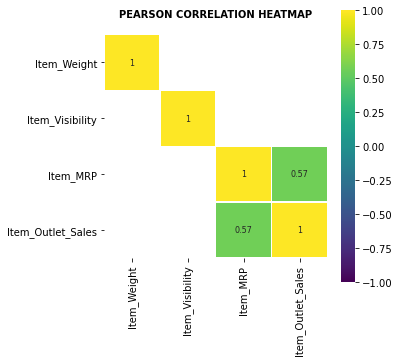

In [12]:
corr = df[num_var].corr() # We already examined SalePrice correlations
plt.figure(figsize=(5, 5))

corr_heatmap=sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
corr_heatmap.set_title("PEARSON CORRELATION HEATMAP\n", fontsize = 10, fontweight = "bold")
corr_heatmap

#### 4. Pairplot

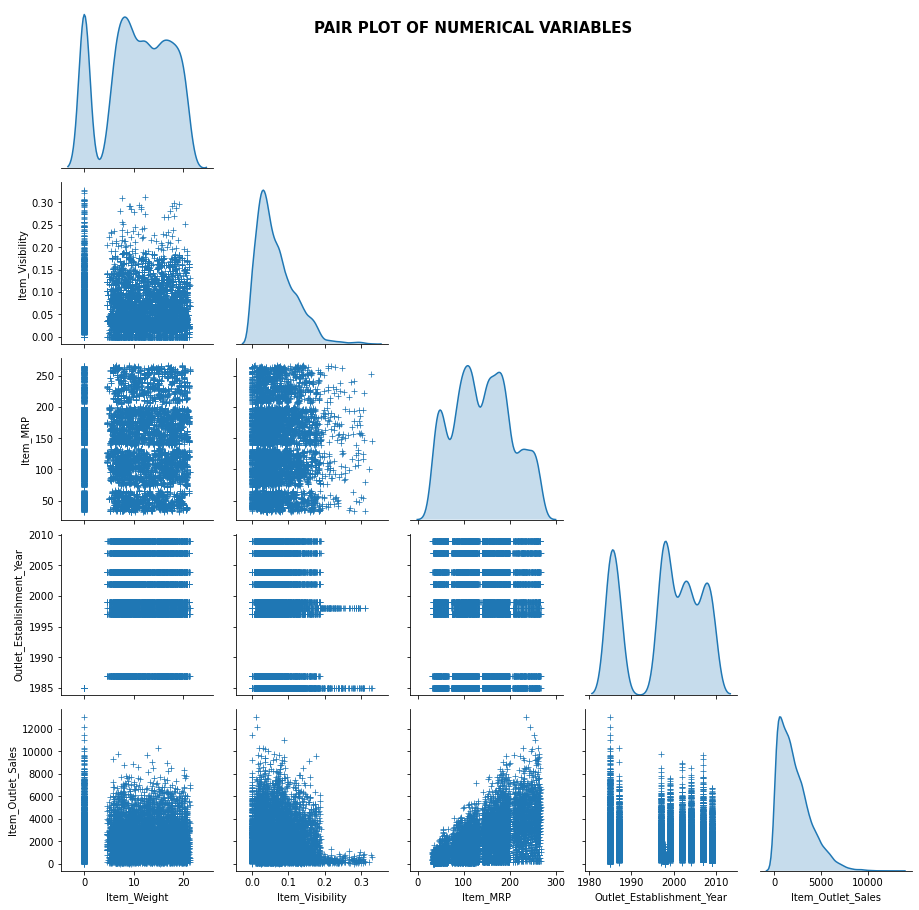

In [13]:
pair_plot = sns.pairplot(df #, hue = "Outlet_Size" # optional
                         , diag_kind = "kde", corner = True, markers = '+',)
pair_plot.fig.suptitle("PAIR PLOT OF NUMERICAL VARIABLES", size = 15, fontweight = "bold")
pair_plot

#### 5. Frequency Plot of Categorical Variables

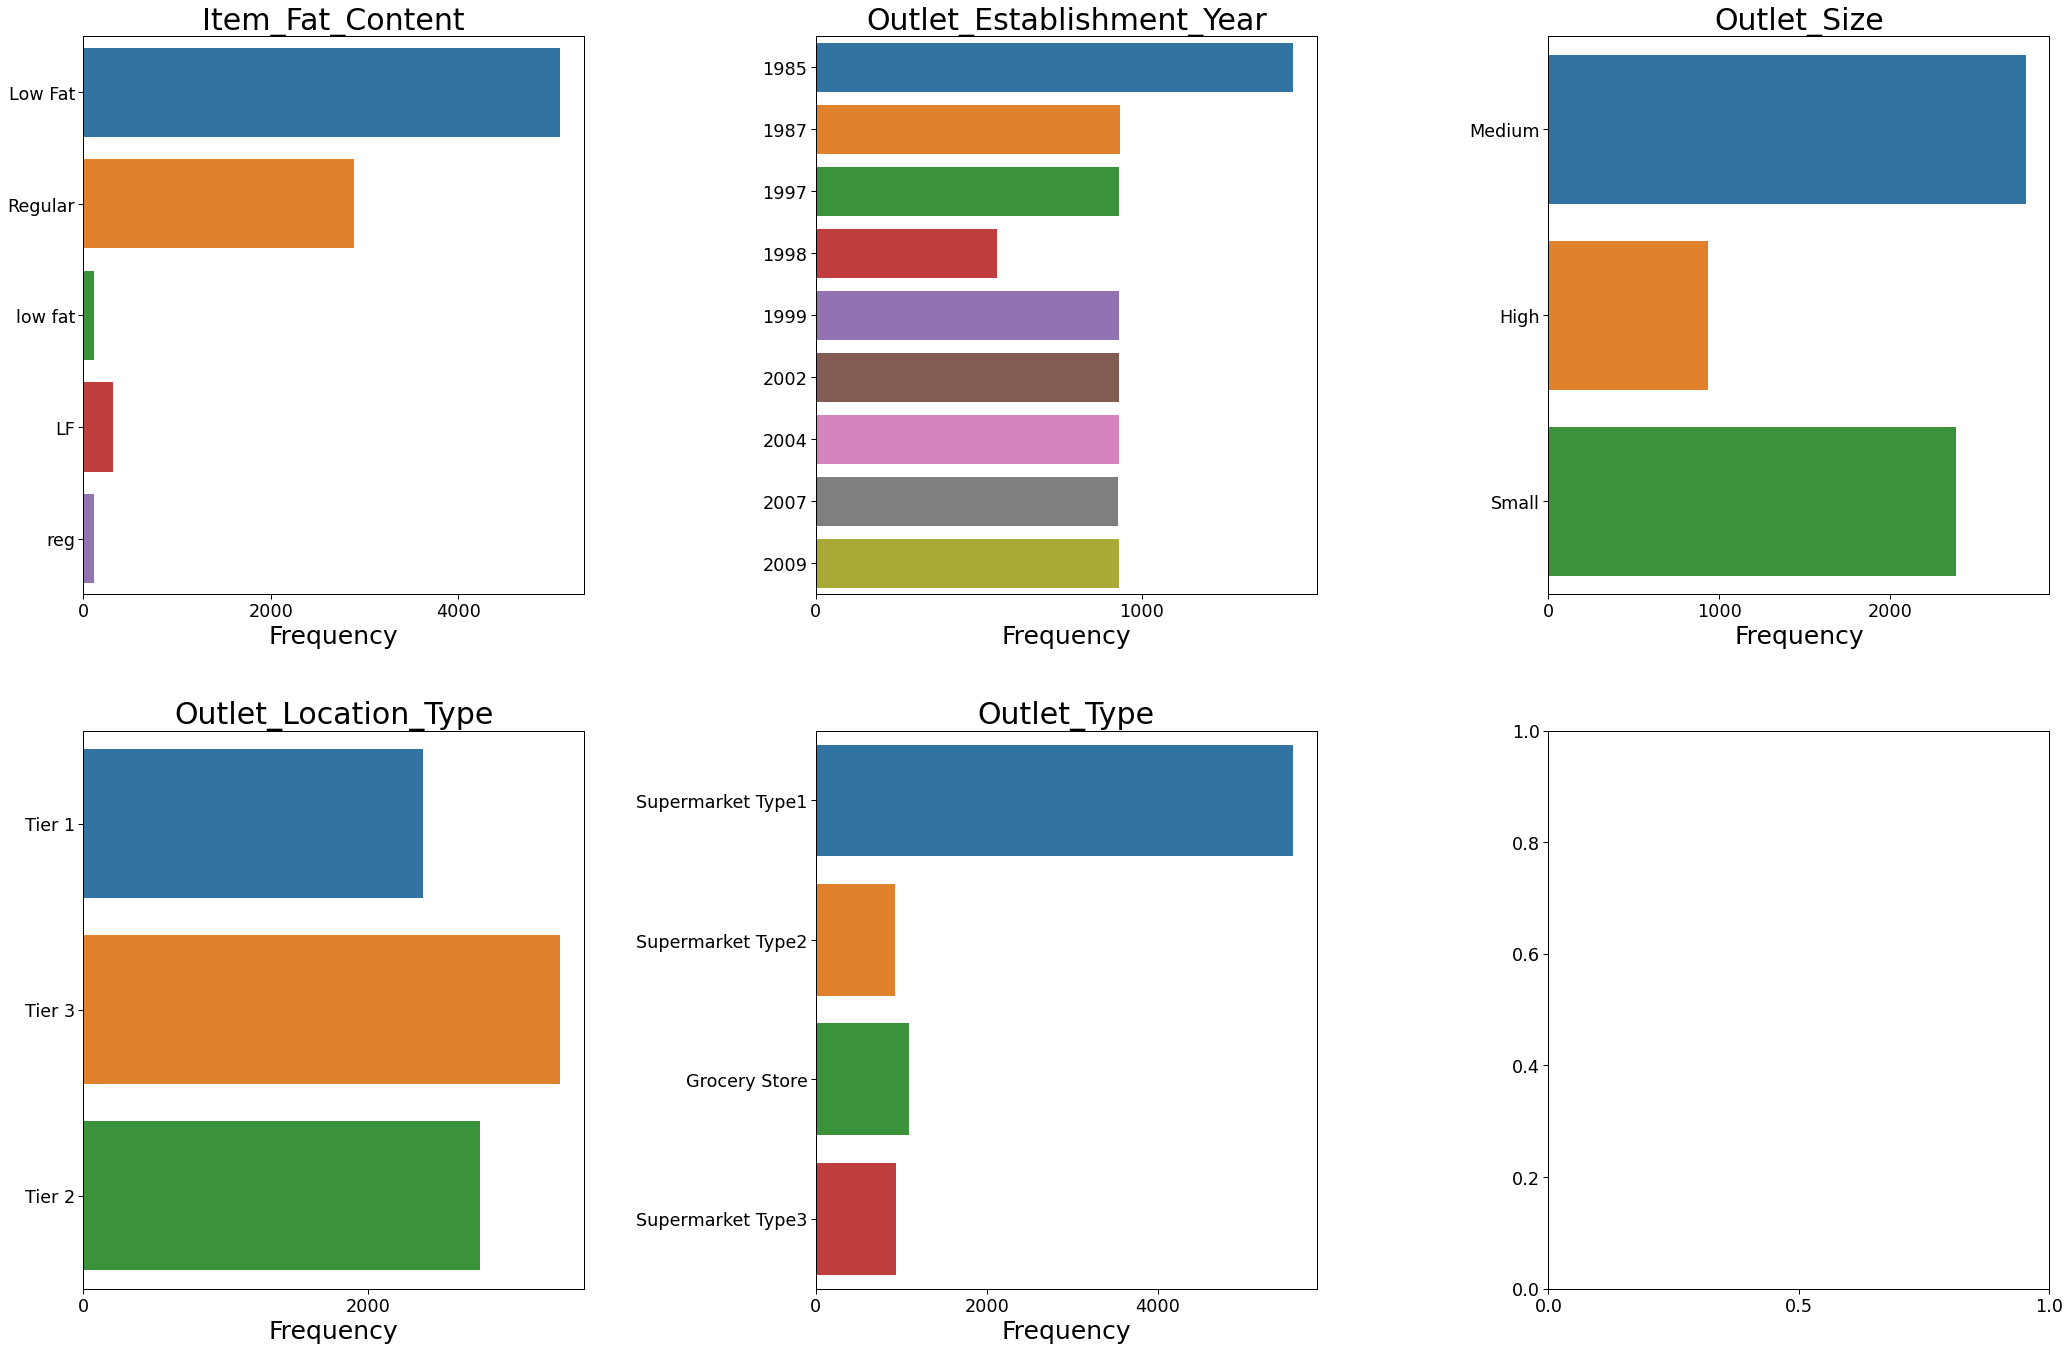

In [15]:
def multi_freq_plot(df,CATEGORIC_FITUR):
    fig, axes = plt.subplots(math.ceil(len(CATEGORIC_FITUR)/3),3,sharey=False)

    fig.set_size_inches(30,20)

    sns.set_context("paper", font_scale=5)

    ax = axes.ravel()

    for i in range(len(CATEGORIC_FITUR)):
        sns.countplot(y=CATEGORIC_FITUR[i],data=df,ax=ax[i])
        ax[i].set_title(CATEGORIC_FITUR[i],fontsize=30)
        ax[i].set_xlabel("Frequency",fontsize=25)
        ax[i].set_ylabel("")

    plt.tight_layout()
    plt.show()
    
multi_freq_plot(df,hist_var)